In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Loan_train.csv", index_col="Loan_ID")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### List of all females who are not graduates and got a loan

In [2]:
df[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y")]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
LP002489,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,Y
LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y


#### null values

In [3]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling null values with mode

In [4]:
#First we import scipy function to determine the mode
from scipy.stats import mode
mode(df['Gender'])

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [5]:
mode(df['Gender']).mode[0]

'Male'

In [6]:
#Impute the values:
df['Gender'].fillna(mode(df['Gender']).mode[0], inplace=True)
df['Married'].fillna(mode(df['Married']).mode[0], inplace=True)
df['Self_Employed'].fillna(mode(df['Self_Employed']).mode[0], inplace=True)

#Now check the #missing values again to confirm:
print (df.isnull().sum())

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
#Determine pivot table
impute_grps = df.pivot_table(values="LoanAmount", index=["Gender","Married","Self_Employed"])
impute_grps

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

#### Inputting mean values for each group iterating thru iterrows

In [8]:
#iterate only through rows with missing LoanAmount
for i,row in df.loc[df['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  df.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print (df.isnull().sum())

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Note:

Multi-index requires tuple for defining groups of indices in pandas loc statement. This is a tuple used in function.
The .values[0] suffix is required because, by default a series element is returned which has an index not matching with that of the pandas dataframe. In this case, a direct assignment gives an error.

#### “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below

In [9]:
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [10]:
pd.crosstab(df["Credit_History"],df["Loan_Status"],normalize=True)

Loan_Status,N,Y
Credit_History,,
0.0,0.145390,0.012411
1.0,0.171986,0.670213


#### Merge Pandas DataFrames: loan and average property rates (INR per sq meters)

In [11]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [12]:
df_merged = df.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
df_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179
Semiurban,5000,233
Urban,12000,202


#### sorting values

In [13]:
df_sorted = df.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
df_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


#### comparing the distribution of ApplicantIncome by Loan_Status

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

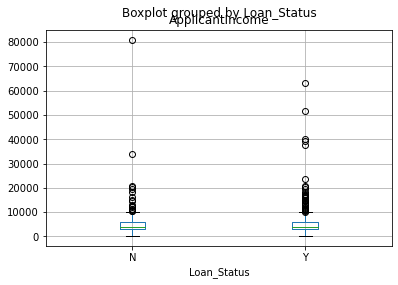

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

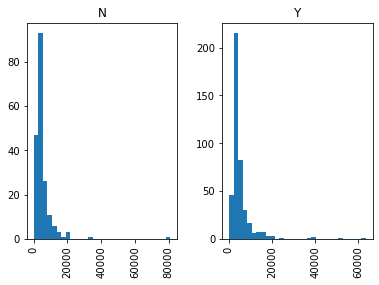

In [15]:
df.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

In [36]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
df["LoanAmount_Bin"] = binning(df["LoanAmount"], cut_points, labels)
print (pd.value_counts(df["LoanAmount_Bin"], sort=False))

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64
